In [0]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from keras.layers import Input,Dense,Dropout,Flatten,LeakyReLU #-ve value mien zero nahi hoga LeakyRelu mien but ek chote factor se multiply hoga taaki - X axis ke paas hi rahe

from keras.models import Model,Sequential
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import backend as K


Using TensorFlow backend.


In [0]:
np.random.seed(1000)

In [0]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
X_train = (x_train.astype(np.float32) -127.5)/127.5
print(X_train.shape)

(60000, 28, 28)


In [0]:
#Flattening of Image
X_train = X_train.reshape(60000,784) #or(-1,28*28)

In [0]:
adam =Adam(lr=0.0002, beta_1=0.5)

In [0]:
generator = Sequential()
generator.add(Dense(256,input_dim=(100))) #10x10
generator.add(LeakyReLU(0.2))

generator.add(Dense(512))
generator.add(LeakyReLU(0.2))

generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))

generator.add(Dense(784,activation='tanh'))
generator.compile(loss="binary_crossentropy",optimizer=adam)
generator.summary()






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_____________________

In [0]:
discriminator =Sequential()
discriminator.add(Dense(1024,input_dim=784))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))

discriminator.add(Dense(1024,input_dim=784))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))

discriminator.add(Dense(1024,input_dim=784))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))

discriminator.add(Dense(1,activation="sigmoid"))
discriminator.compile(loss="binary_crossentropy",optimizer=adam)
discriminator.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
____

In [0]:
discriminator.trainable=False
ganInput = Input(shape=(100,))
x = generator(ganInput)
ganOutput = discriminator(x)

gan = Model(input=ganInput,output=ganOutput)
gan.compile(loss="binary_crossentropy",optimizer=adam)
gan.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 2904065   
Total params: 4,390,417
Trainable params: 1,486,352
Non-trainable params: 2,904,065
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("se...)`
  


In [0]:
def generateAndPlot():
    num_examples = 100
    noise = np.random.normal(0,1,size=[num_examples,100])
    generatedImages = generator.predict(noise)
    generatedImages = generatedImages.reshape(num_examples,28,28)
    
    plt.figure(figsize=(10,10))
    for i in range(num_examples):
        plt.subplot(10,10,i+1)
        plt.imshow(generatedImages[i],interpolation='nearest',cmap='gray_r')
        plt.axis('off')
    plt.show()

In [0]:
def train(epochs=2,batchSize=128):
    m= X_train.shape[0]
    
    generateAndPlot()
    
    
    batchCount= m//batchSize
    for e in range(epochs):
        print(f"Epoch: {e}")
        for _ in tqdm(range(batchCount)):
            noise = np.random.normal(0,1,size=[batchSize, 100])
            generatedImages = generator.predict(noise)
            
            imageBatch = X_train[np.random.randint(0, m, size=batchSize)]
            
            X = np.concatenate([imageBatch,generatedImages])
            yDis = np.zeros(2*batchSize)
            yDis[:batchSize] = 0.9 # one sided label smoothing
            discriminator.trainable = True
            dLoss = discriminator.train_on_batch(X,yDis)
            discriminator.trainable = False
            
            noise = np.random.normal(0,1,size=[batchSize, 100]) # harr image ki dim = 10 x 10
            yGan = np.ones(batchSize)
            gLoss = gan.train_on_batch(noise,yGan)
            
        if e % 10 == 0:
            generateAndPlot()
            

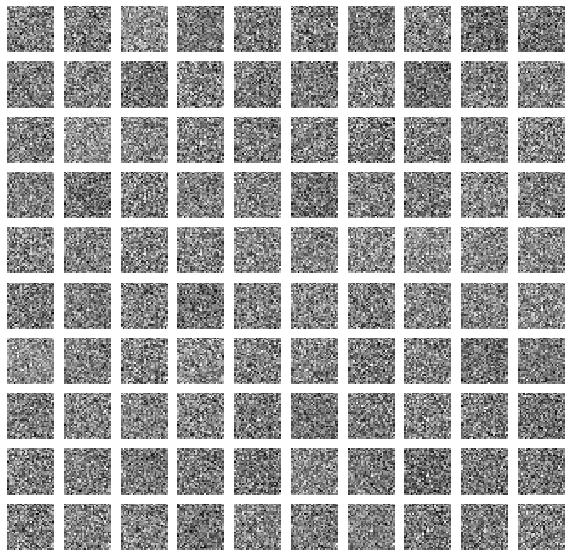

  0%|          | 0/468 [00:00<?, ?it/s]

Epoch: 0


100%|██████████| 468/468 [00:13<00:00, 34.44it/s]


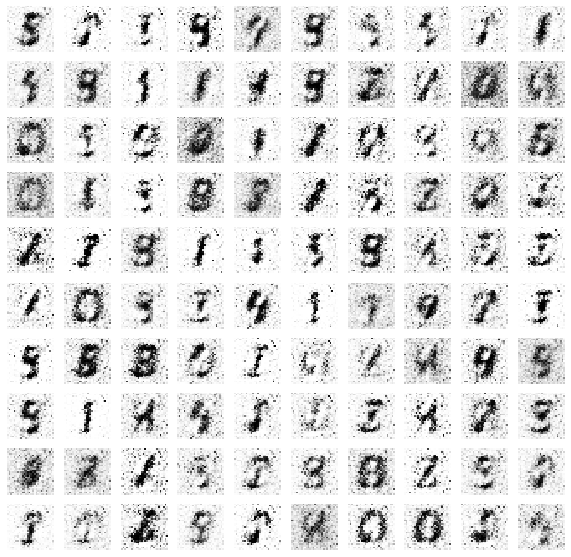

  1%|          | 3/468 [00:00<00:19, 23.53it/s]

Epoch: 1


  1%|          | 4/468 [00:00<00:11, 39.33it/s]

Epoch: 2


  1%|          | 4/468 [00:00<00:12, 38.48it/s]

Epoch: 3


  1%|          | 4/468 [00:00<00:11, 39.21it/s]

Epoch: 4


  1%|          | 5/468 [00:00<00:11, 39.20it/s]

Epoch: 5


  1%|          | 4/468 [00:00<00:12, 38.63it/s]

Epoch: 6


  1%|          | 5/468 [00:00<00:11, 40.70it/s]

Epoch: 7


  1%|          | 5/468 [00:00<00:11, 41.24it/s]

Epoch: 8


  1%|          | 4/468 [00:00<00:11, 39.95it/s]

Epoch: 9


  1%|          | 4/468 [00:00<00:12, 38.58it/s]

Epoch: 10


100%|██████████| 468/468 [00:11<00:00, 39.19it/s]


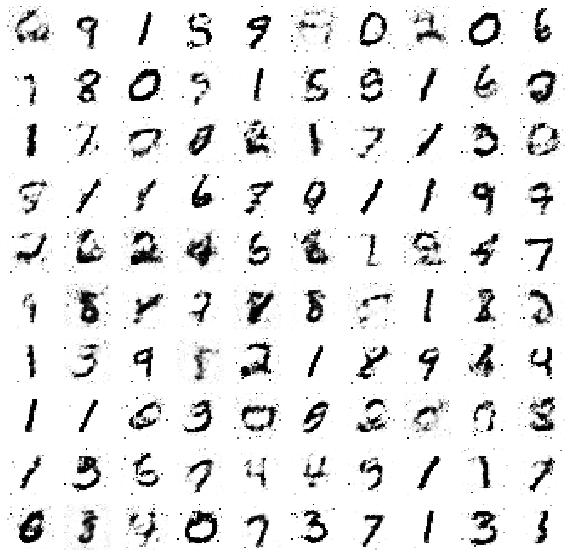

  1%|          | 3/468 [00:00<00:15, 29.70it/s]

Epoch: 11


  1%|          | 4/468 [00:00<00:12, 37.68it/s]

Epoch: 12


  1%|          | 4/468 [00:00<00:11, 39.20it/s]

Epoch: 13


  1%|          | 5/468 [00:00<00:11, 40.36it/s]

Epoch: 14


  1%|          | 4/468 [00:00<00:12, 38.53it/s]

Epoch: 15


  1%|          | 4/468 [00:00<00:11, 39.15it/s]

Epoch: 16


  1%|          | 5/468 [00:00<00:11, 40.62it/s]

Epoch: 17


  1%|          | 5/468 [00:00<00:11, 40.23it/s]

Epoch: 18


  1%|          | 4/468 [00:00<00:11, 39.71it/s]

Epoch: 19


  1%|          | 5/468 [00:00<00:11, 41.04it/s]

Epoch: 20


100%|██████████| 468/468 [00:11<00:00, 39.47it/s]


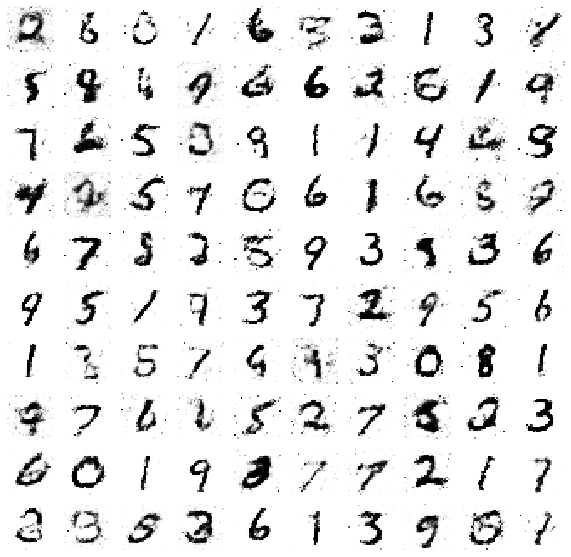

  1%|          | 3/468 [00:00<00:16, 29.00it/s]

Epoch: 21


  1%|          | 4/468 [00:00<00:11, 39.67it/s]

Epoch: 22


  1%|          | 5/468 [00:00<00:11, 40.19it/s]

Epoch: 23


  1%|          | 4/468 [00:00<00:11, 38.99it/s]

Epoch: 24


  1%|          | 4/468 [00:00<00:11, 39.19it/s]

Epoch: 25


  1%|          | 4/468 [00:00<00:11, 39.06it/s]

Epoch: 26


  1%|          | 4/468 [00:00<00:11, 39.84it/s]

Epoch: 27


  1%|          | 4/468 [00:00<00:11, 39.49it/s]

Epoch: 28


  1%|          | 4/468 [00:00<00:12, 38.63it/s]

Epoch: 29


  1%|          | 5/468 [00:00<00:11, 40.31it/s]

Epoch: 30


100%|██████████| 468/468 [00:11<00:00, 39.54it/s]


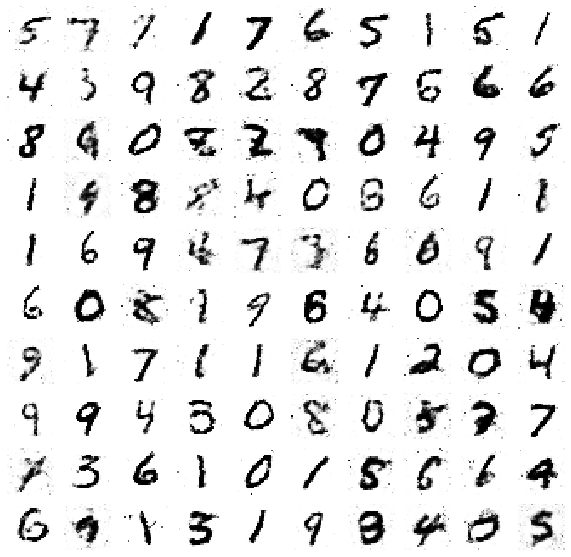

  1%|          | 4/468 [00:00<00:13, 33.92it/s]

Epoch: 31


  1%|          | 4/468 [00:00<00:11, 39.81it/s]

Epoch: 32


  1%|          | 5/468 [00:00<00:11, 40.24it/s]

Epoch: 33


 35%|███▍      | 162/468 [00:04<00:07, 39.29it/s]

In [0]:
train(50)